In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
y = dataset['Exited']

In [5]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [6]:
geo = dataset['Geography']

In [7]:
geo = pd.get_dummies(geo, drop_first=True )

In [8]:
gender = dataset['Gender']

In [9]:
gender = pd.get_dummies(gender, drop_first=True )

In [10]:
X = pd.concat([X,gender,geo], axis=1)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Male             10000 non-null  uint8  
 9   Germany          10000 non-null  uint8  
 10  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [12]:
from keras.optimizers import Adam

Using TensorFlow backend.


In [13]:
# X.isnull()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
from keras.models import Sequential

In [17]:
model = Sequential()

In [18]:
from keras.layers import Dense

In [19]:
model.add(Dense(units=6, input_dim=11, activation='relu' ))

In [20]:
model.add(Dense(units=6, activation='relu'))

In [21]:
model.add(Dense(units=6, activation='relu'))

In [22]:
model.add(Dense(units=1,  activation='sigmoid' ))

In [23]:
model.compile(optimizer=Adam(learning_rate=0.000001),loss='binary_crossentropy' )

In [24]:
model.fit(X_train,y_train , epochs=200 , verbose=0)

In [25]:
df_loss = pd.DataFrame(model.history.history)

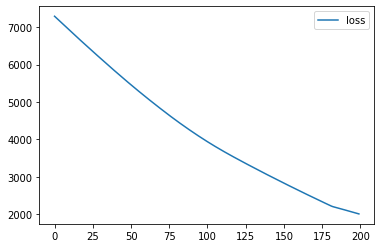

In [26]:
df_loss.plot()